<a href="https://colab.research.google.com/github/avinashbatchala/abdev/blob/master/twitter_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

#----------------------- Data Scraping -----------------------#

#Import Required Modules
from tweepy.streaming import StreamListener #prints live tweets to console
from tweepy import OAuthHandler #Authenticates User APIs
from tweepy import Stream

# Twitter API keys are generted using twitter developer account. https://dev.twitter.com/apps/new, use this link to generate API keys
'''
Replaces the empty strings with API keys genrated, I removed them here as they are private
'''
access_token = ""
access_token_secret = ""
consumer_key = ""
consumer_secret = ""

# List of keywords that must be included in the tweets, which we will extract
hash_tags = ['COVID-19', 'Corona Virus', 'Stay Home']

# Initialize Global Count variable
count = 0

# Input number of tweets to be downloaded
num_tweets = 100000

# Create the class that will handle the tweet stream.
class StdOutListener(StreamListener):
    '''
    This class is taken from tweepy documentation and a minor modification is made to download reuired number of tweets.
    '''
    def on_data(self, data):
        global count
        global num_tweets
        global stream
        if count < num_tweets:
            file = open("tweets1.txt", "a")
            file.write(data)
            file.close()
            if count%1000 == 0:
              print("Tweet", count, "is Saved")
            count += 1
            return True
        else:
            stream.disconnect()

    def on_error(self, status):
        print(status)


# Handles Twitter authentication
l = StdOutListener()
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
stream = Stream(auth, l)

stream.filter(languages=["en"], track=hash_tags)  #stream.filter param is used to extract only desired tweets. In this program the params used are languages=['en'], this is used to extract only tweets in english language.

In [ ]:
import pandas as pd  #pandas is used to create dataframes, which makes manipulations easy
import string  # string is imorted to remove the punctuations and digits
import re  #regular expressions
from textblob import TextBlob #textblob is a python library used to assign polarity and subjectivity to tweets
import nltk #nltk is a Natural Language Processing Library 
nltk.download('stopwords')
import json

tweets_data_path = "/content/tweets1.txt"  
tweets_data = []  
tweets_file = open(tweets_data_path, "r")  
for line in tweets_file:  
    try:  
        tweet = json.loads(line)  
        tweets_data.append(tweet)  
    except:  
        continue
tweets = pd.DataFrame()
tweets['text'] = list(map(lambda tweet: tweet['text'], tweets_data))
tweets['username'] = list(map(lambda tweet: tweet['user']['screen_name'], tweets_data))
tweets['timestamp'] = list(map(lambda tweet: tweet['created_at'], tweets_data))
tweets['location'] = list(map(lambda tweet: tweet['user']['location'], tweets_data))
tweets['likes'] = list(map(lambda tweet: tweet['user']['favourites_count'], tweets_data))

tweets.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,username,timestamp,location,likes
0,"RT @PTI_News: Timely reporting, management of ...",vinayka59670035,Tue May 05 11:11:49 +0000 2020,sonepat Haryana,194648
1,"RT @ND4BETO: ""What’s next for Beto O'Rourke? I...",Katy_Patriot,Tue May 05 11:11:49 +0000 2020,"Katy, TX",98370
2,RT @DukeCognito: Cinco De Stay Your Ass At Home!,xBigxNate,Tue May 05 11:11:49 +0000 2020,None,2423
3,RT @Daddylishes: That makcik’s expression just...,frsssssssss09_,Tue May 05 11:11:49 +0000 2020,None,268762
4,RT @celinedion: I’m honoured to be part of Une...,LaurentCourtain,Tue May 05 11:11:49 +0000 2020,"Bruxelles, Belgique",1352


In [ ]:
df = tweets

In [ ]:
def strip_links(text):
    link_regex    = re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL)
    links         = re.findall(link_regex, text)
    for link in links:
        text = text.replace(link[0], ', ')    
    return text

def strip_all_entities(text):
    entity_prefixes = ['@','#']
    for separator in  string.punctuation:
        if separator not in entity_prefixes :
            text = text.replace(separator,' ')
    words = []
    for word in text.split():
        word = word.strip()
        if word:
            if word[0] not in entity_prefixes:
                words.append(word)
    return ' '.join(words)

df['clean_tweet'] = df['text'].apply(lambda text: strip_all_entities(strip_links(text)))

In [ ]:
df.head()

,text,username,timestamp,location,likes,clean_tweet
0,"RT @PTI_News: Timely reporting, management of ...",vinayka59670035,Tue May 05 11:11:49 +0000 2020,sonepat Haryana,194648,RT News Timely reporting management of COVID 1...
1,"RT @ND4BETO: ""What’s next for Beto O'Rourke? I...",Katy_Patriot,Tue May 05 11:11:49 +0000 2020,"Katy, TX",98370,RT What’s next for Beto O Rourke In this week ...
2,RT @DukeCognito: Cinco De Stay Your Ass At Home!,xBigxNate,Tue May 05 11:11:49 +0000 2020,None,2423,RT Cinco De Stay Your Ass At Home
3,RT @Daddylishes: That makcik’s expression just...,frsssssssss09_,Tue May 05 11:11:49 +0000 2020,None,268762,RT That makcik’s expression just says it all 😂
4,RT @celinedion: I’m honoured to be part of Une...,LaurentCourtain,Tue May 05 11:11:49 +0000 2020,"Bruxelles, Belgique",1352,RT I’m honoured to be part of Une chance qu’on...


In [ ]:
# converting all tweets to lower case
import string

df['clean_tweet'] = df['clean_tweet'].str.lower()
df.head()


,text,username,timestamp,location,likes,clean_tweet
0,"RT @PTI_News: Timely reporting, management of ...",vinayka59670035,Tue May 05 11:11:49 +0000 2020,sonepat Haryana,194648,rt news timely reporting management of covid 1...
1,"RT @ND4BETO: ""What’s next for Beto O'Rourke? I...",Katy_Patriot,Tue May 05 11:11:49 +0000 2020,"Katy, TX",98370,rt what’s next for beto o rourke in this week ...
2,RT @DukeCognito: Cinco De Stay Your Ass At Home!,xBigxNate,Tue May 05 11:11:49 +0000 2020,None,2423,rt cinco de stay your ass at home
3,RT @Daddylishes: That makcik’s expression just...,frsssssssss09_,Tue May 05 11:11:49 +0000 2020,None,268762,rt that makcik’s expression just says it all 😂
4,RT @celinedion: I’m honoured to be part of Une...,LaurentCourtain,Tue May 05 11:11:49 +0000 2020,"Bruxelles, Belgique",1352,rt i’m honoured to be part of une chance qu’on...


In [ ]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [ ]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df['clean_tweet'] = df['clean_tweet'].apply(lambda text: remove_stopwords(text))
df.head()

,text,username,timestamp,location,likes,clean_tweet
0,"RT @PTI_News: Timely reporting, management of ...",vinayka59670035,Tue May 05 11:11:49 +0000 2020,sonepat Haryana,194648,rt news timely reporting management covid 19 c...
1,"RT @ND4BETO: ""What’s next for Beto O'Rourke? I...",Katy_Patriot,Tue May 05 11:11:49 +0000 2020,"Katy, TX",98370,rt what’s next beto rourke week q amp native e...
2,RT @DukeCognito: Cinco De Stay Your Ass At Home!,xBigxNate,Tue May 05 11:11:49 +0000 2020,None,2423,rt cinco de stay ass home
3,RT @Daddylishes: That makcik’s expression just...,frsssssssss09_,Tue May 05 11:11:49 +0000 2020,None,268762,rt makcik’s expression says 😂
4,RT @celinedion: I’m honoured to be part of Une...,LaurentCourtain,Tue May 05 11:11:49 +0000 2020,"Bruxelles, Belgique",1352,rt i’m honoured part une chance qu’on s’a it’s...


In [ ]:
freq = ['rt', 'dm', 'hi']
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in freq])

df["clean_tweet"] = df["clean_tweet"].apply(lambda text: remove_freqwords(text))
df.head()

,text,username,timestamp,location,likes,clean_tweet
0,"RT @PTI_News: Timely reporting, management of ...",vinayka59670035,Tue May 05 11:11:49 +0000 2020,sonepat Haryana,194648,news timely reporting management covid 19 case...
1,"RT @ND4BETO: ""What’s next for Beto O'Rourke? I...",Katy_Patriot,Tue May 05 11:11:49 +0000 2020,"Katy, TX",98370,what’s next beto rourke week q amp native el p...
2,RT @DukeCognito: Cinco De Stay Your Ass At Home!,xBigxNate,Tue May 05 11:11:49 +0000 2020,None,2423,cinco de stay ass home
3,RT @Daddylishes: That makcik’s expression just...,frsssssssss09_,Tue May 05 11:11:49 +0000 2020,None,268762,makcik’s expression says 😂
4,RT @celinedion: I’m honoured to be part of Une...,LaurentCourtain,Tue May 05 11:11:49 +0000 2020,"Bruxelles, Belgique",1352,i’m honoured part une chance qu’on s’a it’s im...


In [ ]:
from nltk.corpus import wordnet
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

df['clean_tweet'] = df['clean_tweet'].apply(lambda text: lemmatize_words(text))
df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,text,username,timestamp,location,likes,clean_tweet
0,"RT @PTI_News: Timely reporting, management of ...",vinayka59670035,Tue May 05 11:11:49 +0000 2020,sonepat Haryana,194648,news timely report management covid 19 case cr...
1,"RT @ND4BETO: ""What’s next for Beto O'Rourke? I...",Katy_Patriot,Tue May 05 11:11:49 +0000 2020,"Katy, TX",98370,what’s next beto rourke week q amp native el p...
2,RT @DukeCognito: Cinco De Stay Your Ass At Home!,xBigxNate,Tue May 05 11:11:49 +0000 2020,None,2423,cinco de stay ass home
3,RT @Daddylishes: That makcik’s expression just...,frsssssssss09_,Tue May 05 11:11:49 +0000 2020,None,268762,makcik’s expression say 😂
4,RT @celinedion: I’m honoured to be part of Une...,LaurentCourtain,Tue May 05 11:11:49 +0000 2020,"Bruxelles, Belgique",1352,i’m honour part une chance qu’on s’a it’s impo...


In [ ]:
!pip install vaderSentiment

     |████████████████████████████████| 133kB 2.8MB/s 


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
df[['negative', 'neutral', 'positive', 'compound']] = df['clean_tweet'].apply(lambda x:pd.Series(analyzer.polarity_scores(x)))

In [ ]:
def get_analysis(score):
    if score >= 0.05:
      return 'positive'
    elif score <= - 0.05:
      return 'negative'
    else:
      return 'neutral'

df['analysis'] = df['compound'].apply(get_analysis)
print(df.head())

                                                text  ...  analysis
0  RT @PTI_News: Timely reporting, management of ...  ...   neutral
1  RT @ND4BETO: "What’s next for Beto O'Rourke? I...  ...   neutral
2   RT @DukeCognito: Cinco De Stay Your Ass At Home!  ...  negative
3  RT @Daddylishes: That makcik’s expression just...  ...  positive
4  RT @celinedion: I’m honoured to be part of Une...  ...  positive

[5 rows x 11 columns]


In [ ]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

hash_tags = hashtag_extract(df['text'])
hash_tags = list(filter(None, hash_tags)) 
hash_tags = [item for sublist in hash_tags for item in sublist]

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0, flags=flags)


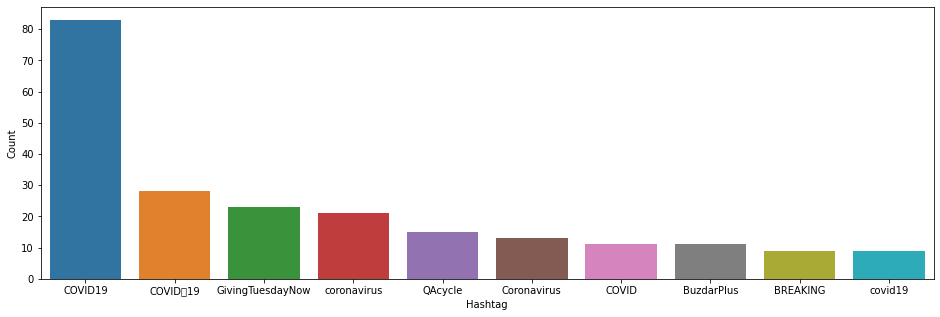

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

a = nltk.FreqDist(hash_tags)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

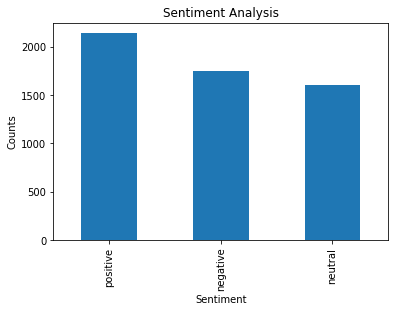

In [ ]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['analysis'].value_counts().plot(kind = 'bar')
plt.show()

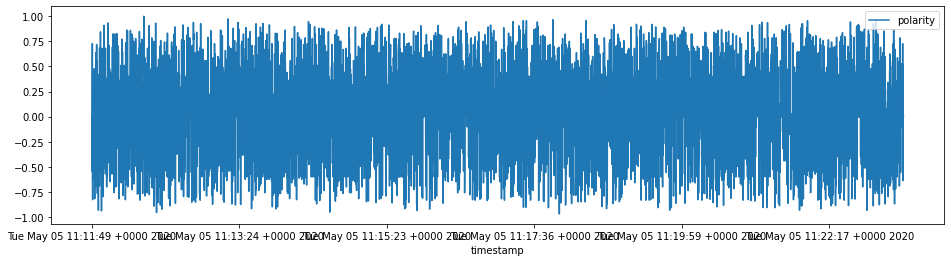

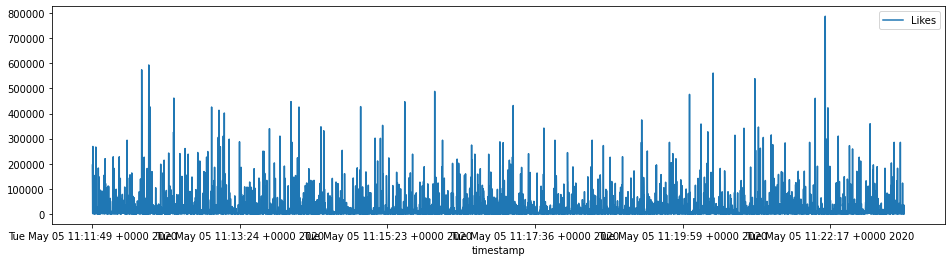

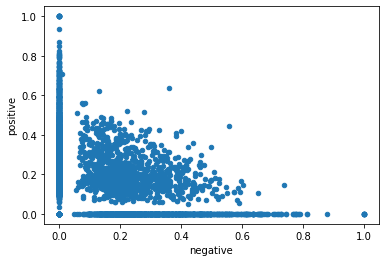

In [ ]:

# Let’s plot the results
import matplotlib.pyplot as plt

# time_subj = pd.Series(data=df['subjectivity'].values, index=df['timestamp'])
# time_subj.plot(figsize=(16, 4), label="subjectivity", legend=True)
# plt.show()

time_polar = pd.Series(data=df['compound'].values, index=df['timestamp'])
time_polar.plot(figsize=(16, 4), label="polarity", legend=True)
plt.show()

time_likes = pd.Series(data=df['likes'].values, index=df['timestamp'])
time_likes.plot(figsize=(16, 4), label="Likes", legend=True)
plt.show()

df.plot.scatter(x='negative', y='positive')
plt.show()

# df.plot.scatter(x='subjectivity', y='polarity')
# plt.show()


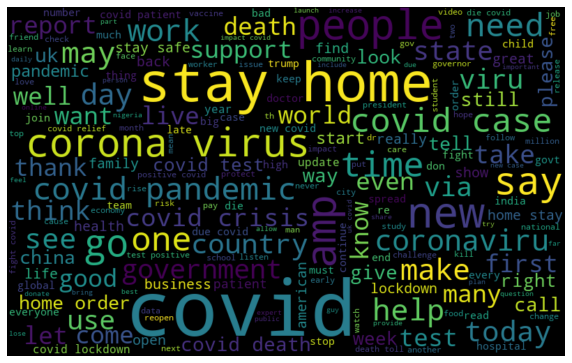

In [ ]:
all_words = ' '.join([text for text in df['clean_tweet'].astype(str)])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
def vectorize(text, maxx_features):
    vectorizer = TfidfVectorizer(max_features=maxx_features)
    X = vectorizer.fit_transform(df['clean_tweet'].values.astype('U'))
    return X

In [ ]:
text = df['clean_tweet'].values
X = vectorize(text, 2 ** 12)
X.shape

(5502, 4096)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, random_state=42)
pca_result = pca.fit_transform(X.toarray())
pca_result.shape

(5502, 2309)

In [ ]:
df['pca_x'] = xs=pca_result[:,0]
df['pca_y'] = pca_result[:,1]
df['pca_z'] = pca_result[:,2]

In [ ]:
k = 10
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(pca_result)
y = y_pred
df['y'] = y_pred

In [ ]:
df['cluster'] = pd.Series(y, index=df.index)
print(df['cluster'])

0       4
1       6
2       8
3       2
4       1
       ..
9988    9
9990    9
9992    0
9997    9
9998    9
Name: cluster, Length: 5502, dtype: int32


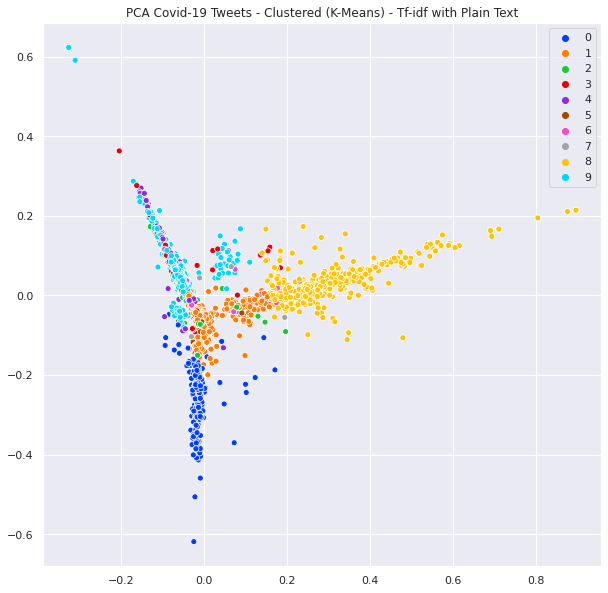

In [ ]:
# sns settings
sns.set(rc={'figure.figsize':(10, 10)})

# colors
palette = sns.color_palette("bright", len(set(y)))

# plot
sns.scatterplot(pca_result[:,0], pca_result[:,1], hue=y, legend='full', palette=palette)
plt.title("PCA Covid-19 Tweets - Clustered (K-Means) - Tf-idf with Plain Text")
# plt.savefig("plots/pca_covid19_label_TFID.png")
plt.show()

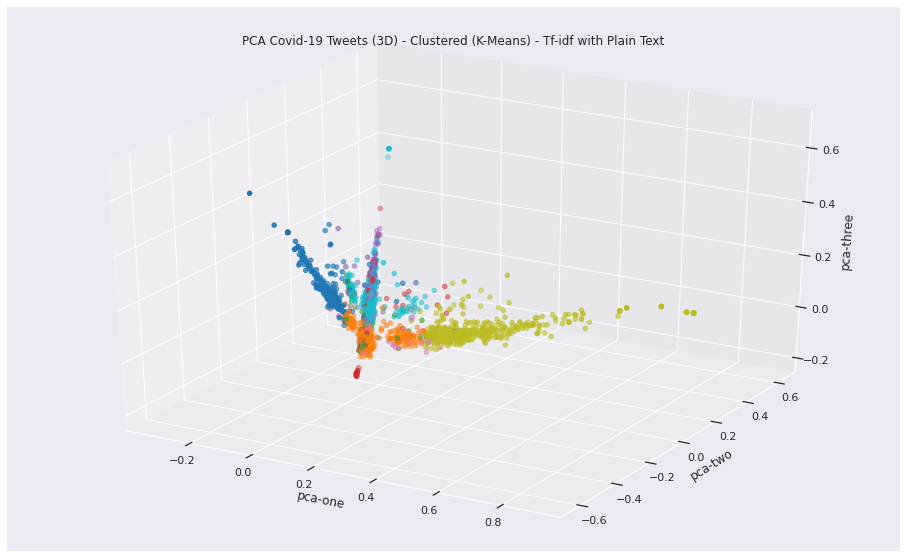

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=pca_result[:,0], 
    ys=pca_result[:,1], 
    zs=pca_result[:,2], 
    c=y, 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.title("PCA Covid-19 Tweets (3D) - Clustered (K-Means) - Tf-idf with Plain Text")
# plt.savefig("plots/pca_covid19_label_TFID_3d.png")
plt.show()

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(verbose=1, perplexity=100, random_state=42)
X_embedded = tsne.fit_transform(X.toarray())

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 5502 samples in 3.477s...
[t-SNE] Computed neighbors for 5502 samples in 233.441s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5502
[t-SNE] Computed conditional probabilities for sample 2000 / 5502
[t-SNE] Computed conditional probabilities for sample 3000 / 5502
[t-SNE] Computed conditional probabilities for sample 4000 / 5502
[t-SNE] Computed conditional probabilities for sample 5000 / 5502
[t-SNE] Computed conditional probabilities for sample 5502 / 5502
[t-SNE] Mean sigma: 0.507435
[t-SNE] KL divergence after 250 iterations with early exaggeration: 139.300262
[t-SNE] KL divergence after 1000 iterations: 3.221980


In [ ]:
df['tsne_x'] = X_embedded[:,0]
df['tsne_y'] = X_embedded[:,1]


In [ ]:
df.to_csv('twitter_cluster_data.csv')

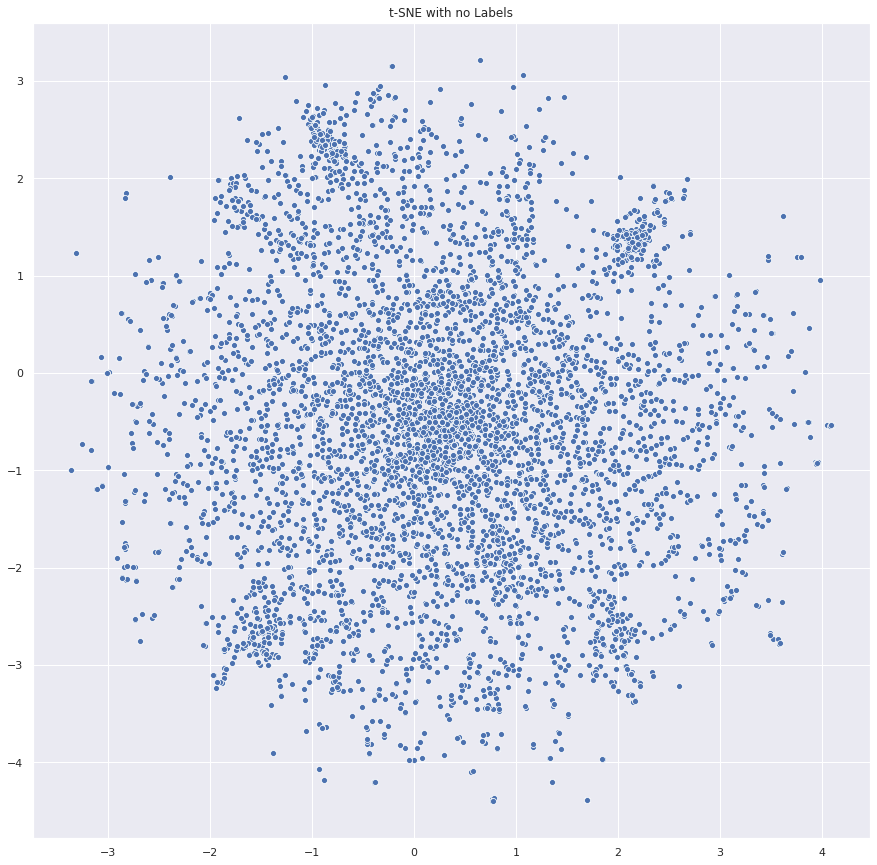

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.color_palette("bright", 1)

# plot
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], palette=palette)
plt.title('t-SNE with no Labels')
plt.savefig("t-sne_covid19.png")
plt.show()

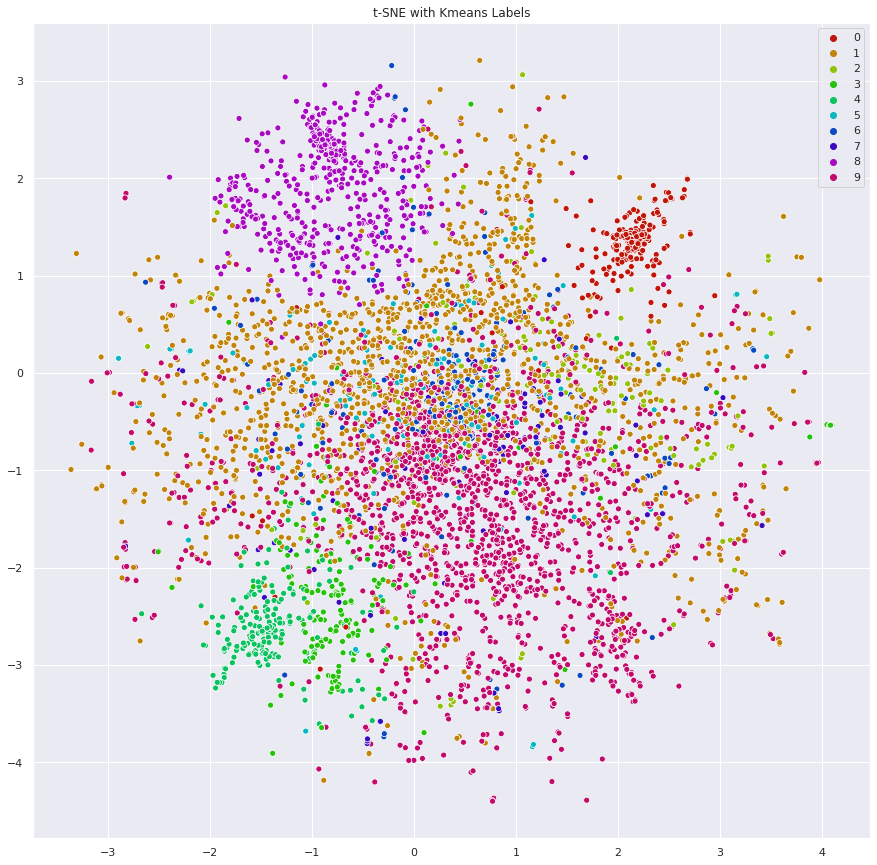

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.hls_palette(10, l=.4, s=.9)

# plot
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y_pred, legend='full', palette=palette)
plt.title('t-SNE with Kmeans Labels')
plt.savefig("improved_cluster_tsne.png")
plt.show()

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
vectorizers = []
    
for ii in range(0, 10):
    # Creating a vectorizer
    vectorizers.append(CountVectorizer(min_df=5, max_df=0.9, stop_words='english', lowercase=True, token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}'))

In [ ]:
vectorizers[0]

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=0.9, max_features=None, min_df=5,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='[a-zA-Z\\-][a-zA-Z\\-]{2,}',
                tokenizer=None, vocabulary=None)

In [ ]:
vectorized_data = []

for current_cluster, cvec in enumerate(vectorizers):
    try:
        vectorized_data.append(cvec.fit_transform(df.loc[df['y'] == current_cluster, 'clean_tweet']))
    except Exception as e:
        print("Not enough instances in cluster: " + str(current_cluster))
        vectorized_data.append(None)

In [ ]:
# number of topics per cluster
NUM_TOPICS_PER_CLUSTER = 3

lda_models = []
for ii in range(0, 10):
    # Latent Dirichlet Allocation Model
    lda = LatentDirichletAllocation(n_components=NUM_TOPICS_PER_CLUSTER, max_iter=10, learning_method='online',verbose=False, random_state=42)
    lda_models.append(lda)
    
lda_models[0]

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=3, n_jobs=None,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=False)

In [ ]:
clusters_lda_data = []

for current_cluster, lda in enumerate(lda_models):
    # print("Current Cluster: " + str(current_cluster))
    
    if vectorized_data[current_cluster] != None:
        clusters_lda_data.append((lda.fit_transform(vectorized_data[current_cluster])))

In [ ]:
# Functions for printing keywords for each topic
def selected_topics(model, vectorizer, top_n=3):
    current_words = []
    keywords = []
    
    for idx, topic in enumerate(model.components_):
        words = [(vectorizer.get_feature_names()[i], topic[i]) for i in topic.argsort()[:-top_n - 1:-1]]
        for word in words:
            if word[0] not in current_words:
                keywords.append(word)
                current_words.append(word[0])
                
    keywords.sort(key = lambda x: x[1])  
    keywords.reverse()
    return_values = []
    for ii in keywords:
        return_values.append(ii[0])
    return return_values


In [ ]:
all_keywords = []
for current_vectorizer, lda in enumerate(lda_models):
    # print("Current Cluster: " + str(current_vectorizer))

    if vectorized_data[current_vectorizer] != None:
        all_keywords.append(selected_topics(lda, vectorizers[current_vectorizer]))

In [ ]:
all_keywords[0][:5]

['people', 'spread', 'protection', 'like', 'death']

In [ ]:
f=open('/content/topics_final.txt','w')

count = 0

for ii in all_keywords:

    if vectorized_data[count] != None:
        f.write(', '.join(ii) + "\n")
    else:
        f.write("Not enough instances to be determined. \n")
        f.write(', '.join(ii) + "\n")
    count += 1

f.close()

In [ ]:
# function to print out classification model report
def classification_report(model_name, test, pred):
    from sklearn.metrics import precision_score, recall_score
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import f1_score
    
    print(model_name, ":\n")
    print("Accuracy Score: ", '{:,.3f}'.format(float(accuracy_score(test, pred)) * 100), "%")
    print("     Precision: ", '{:,.3f}'.format(float(precision_score(test, pred, average='macro')) * 100), "%")
    print("        Recall: ", '{:,.3f}'.format(float(recall_score(test, pred, average='macro')) * 100), "%")
    print("      F1 score: ", '{:,.3f}'.format(float(f1_score(test, pred, average='macro')) * 100), "%")

In [ ]:
from sklearn.model_selection import train_test_split

# test set size of 20% of the data and the random seed 42 <3
X_train, X_test, y_train, y_test = train_test_split(X.toarray(),y_pred, test_size=0.2, random_state=42)

print("X_train size:", len(X_train))
print("X_test size:", len(X_test), "\n")

X_train size: 4401
X_test size: 1101 



In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import SGDClassifier

# SGD instance
sgd_clf = SGDClassifier(max_iter=10000, tol=1e-3, random_state=42, n_jobs=4)
# train SGD
sgd_clf.fit(X_train, y_train)

# cross validation predictions
sgd_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3, n_jobs=4)

# print out the classification report
classification_report("Stochastic Gradient Descent Report (Training Set)", y_train, sgd_pred)

Stochastic Gradient Descent Report (Training Set) :

Accuracy Score:  97.092 %
     Precision:  96.585 %
        Recall:  94.442 %
      F1 score:  95.447 %


In [ ]:
# cross validation predictions
sgd_pred = cross_val_predict(sgd_clf, X_test, y_test, cv=3, n_jobs=4)

# print out the classification report
classification_report("Stochastic Gradient Descent Report (Test Set)", y_test, sgd_pred)

Stochastic Gradient Descent Report (Training Set) :

Accuracy Score:  88.738 %
     Precision:  90.403 %
        Recall:  73.914 %
      F1 score:  78.886 %


In [ ]:
sgd_cv_score = cross_val_score(sgd_clf, X.toarray(), y_pred, cv=10)
print("Mean cv Score - SGD: {:,.3f}".format(float(sgd_cv_score.mean()) * 100), "%")

Mean cv Score - SGD: 97.456 %


In [ ]:
from bokeh.models import CustomJS

# handle the currently selected article
def selected_code():
    code = """
            var tweet = [];
            var user = [];
            var time = [];
            cb_data.source.selected.indices.forEach(index => tweet.push(source.data['text'][index]));
            cb_data.source.selected.indices.forEach(index => user.push(source.data['username'][index]));
            cb_data.source.selected.indices.forEach(index => time.push(source.data['timestamp'][index]));
            text = "<h4>" + titles[0].toString().replace(/<br>/g, ' ') + "</h4>";
            user = "<p1><b>User:</b> " + user[0].toString().replace(/<br>/g, ' ') + "<br>"
            // time = "<b>Journal</b>" + time[0].toString() + "<br>"
            current_selection.text = tweet + user + time
            current_selection.change.emit();
    """
    return code

# handle the keywords and search
def input_callback(plot, source, out_text, topics): 

    # slider call back for cluster selection
    callback = CustomJS(args=dict(p=plot, source=source, out_text=out_text, topics=topics), code="""
				var key = text.value;
				key = key.toLowerCase();
				var cluster = slider.value;
                var data = source.data; 
                
                
                x = data['x'];
                y = data['y'];
                x_backup = data['x_backup'];
                y_backup = data['y_backup'];
                labels = data['desc'];
                tweet = data['text'];
                user = data['username'];
                analysis = data['compound'];
                if (cluster == '10') {
                    out_text.text = 'Keywords: Slide to specific cluster to see the keywords.';
                    for (i = 0; i < x.length; i++) {
						if(tweet[i].includes(key) || 
						user[i].includes(key) || 
						[i].includes(key) || 
						compound[i].includes(key)) {
							x[i] = x_backup[i];
							y[i] = y_backup[i];
						} else {
							x[i] = undefined;
							y[i] = undefined;
						}
                    }
                }
                else {
                    out_text.text = 'Keywords: ' + topics[Number(cluster)];
                    for (i = 0; i < x.length; i++) {
                        if(tweet[i] == cluster) {
							if(user[i].includes(key) || 
							analysis[i].includes(key) || 
							{
								x[i] = x_backup[i];
								y[i] = y_backup[i];
							} else {
								x[i] = undefined;
								y[i] = undefined;
							}
                        } else {
                            x[i] = undefined;
                            y[i] = undefined;
                        }
                    }
                }
            source.change.emit();
            """)
    return callback

In [ ]:
import bokeh
from bokeh.models import ColumnDataSource, HoverTool, LinearColorMapper, CustomJS, Slider, TapTool, TextInput
from bokeh.palettes import Category20
from bokeh.transform import linear_cmap, transform
from bokeh.io import output_file, show, output_notebook
from bokeh.plotting import figure
from bokeh.models import RadioButtonGroup, TextInput, Div, Paragraph
from bokeh.layouts import column, widgetbox, row, layout
from bokeh.layouts import column

In [ ]:
topic_path = '/content/topics_final.txt'
with open(topic_path) as f:
    topics = f.readlines()

In [ ]:
# show on notebook
output_notebook()
# target labels
y_labels = y_pred

# data sources
source = ColumnDataSource(data=dict(
    x= X_embedded[:,0], 
    y= X_embedded[:,1],
    x_backup = X_embedded[:,0],
    y_backup = X_embedded[:,1],
    desc= y_labels, 
    text= df['text'],
    username = df['username'],
    analysis = df['analysis']
    ))

# hover over information
hover = HoverTool(tooltips=[
    ("text", "@text{safe}"),
    ("username", "@username{safe}"),
    ("alaysis", "@analysis")
],
point_policy="follow_mouse")

# map colors
mapper = linear_cmap(field_name='desc', 
                     palette=Category20[20],
                     low=min(y_labels) ,high=max(y_labels))

# prepare the figure
plot = figure(plot_width=1000, plot_height=850, 
           tools=[hover, 'pan', 'wheel_zoom', 'box_zoom', 'reset', 'save', 'tap'], 
           title="Clustering of the tweets t-SNE and K-Means", 
           toolbar_location="above")

# plot settings
plot.scatter('x', 'y', size=5, 
          source=source,
          fill_color=mapper,
          line_alpha=0.3,
          line_color="black",
          legend = 'labels')
plot.legend.background_fill_alpha = 0.6

In [ ]:
# Keywords
text_banner = Paragraph(text= 'Keywords: Slide to specific cluster to see the keywords.', height=45)
input_callback_1 = input_callback(plot, source, text_banner, topics)

# currently selected article
div_curr = Div(text="""Click on a plot to see the link to the article.""",height=150)
callback_selected = CustomJS(args=dict(source=source, current_selection=div_curr), code=selected_code())
taptool = plot.select(type=TapTool)
taptool.callback = callback_selected

# WIDGETS
slider = Slider(start=0, end=10, value=10, step=1, title="Cluster #", callback=input_callback_1)
keyword = TextInput(title="Search:", callback=input_callback_1)

# pass call back arguments
input_callback_1.args["text"] = keyword
input_callback_1.args["slider"] = slider

In [ ]:
# STYLE
slider.sizing_mode = "stretch_width"
slider.margin=15

keyword.sizing_mode = "scale_both"
keyword.margin=15

div_curr.style={'color': '#BF0A30', 'font-family': 'Helvetica Neue, Helvetica, Arial, sans-serif;', 'font-size': '1.1em'}
div_curr.sizing_mode = "scale_both"
div_curr.margin = 20

text_banner.style={'color': '#0269A4', 'font-family': 'Helvetica Neue, Helvetica, Arial, sans-serif;', 'font-size': '1.1em'}
text_banner.sizing_mode = "scale_both"
text_banner.margin = 20

plot.sizing_mode = "scale_both"
plot.margin = 5

r = row(div_curr,text_banner)
r.sizing_mode = "scale_both"

In [ ]:
# LAYOUT OF THE PAGE
l = layout([
    [slider, keyword],
    [text_banner],
    [div_curr],
    [plot],
])
l.sizing_mode = "scale_both"

# show
output_file('tweets_clustering_interactive.html')
show(l)